### Датасет

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


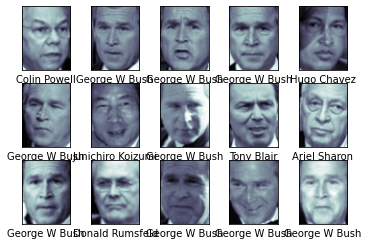

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [2]:
faces.images[0].shape

(62, 47)

In [3]:
faces.images.shape

(1348, 62, 47)

In [4]:
faces.target.shape

(1348,)

## Задание

Наш датасет - лица президентов (faces.images). 1348 лиц, каждое из которых представляет из себя матрицу 62х47. Эталонные классы даны в faces.target. 

Требуется обучить классификатор, предсказывающий наш target. План такой:

1. Преобразовать эти матрицы 62х47 в векторы фичей просто наложив строки или столбцы друг на друга
2. Разбить на трейн/тест
3. Нормализовать
4. Обучить что-нибудь из kNN/SVM/Random Forest (сразу на все классы). Лучше несколько моделей. Подобрать параметры
5. Оценить качество

EXTRA:
1. Попробовать применить PCA и применить классификатора после PCA
2. По метрикам посмотреть какие классы распознаются хуже и добиться улучшения качества засчет up(down)sampling

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
n_samples, height, width = faces.images.shape

In [7]:
# фичи изображений
X = faces.data

# количество фичей каждого изображения
n_features = X.shape[1]
n_features

2914

In [8]:
# таргет классы изображений
y = faces.target

# количество классов в датасете 
n_classes = faces.target_names.shape[0]

In [9]:
# нормализация данных
normalizer = MinMaxScaler()
normalizer.fit(X)
X = normalizer.transform(X)

In [10]:
# делим данные на трейн и тест выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Обучение без PCA**

SVM

In [11]:
parameters1 = {
    'kernel': ['poly', 'rbf'], 
    'C': 10. ** np.arange(-2, 3)
}

In [12]:
model1 = SVC()

In [13]:
svm_model = GridSearchCV(model1, parameters1, cv = 5, n_jobs = -1)

svm_model.fit(X_train, y_train)
print(svm_model.best_params_)

{'C': 1.0, 'kernel': 'poly'}


In [14]:
svm = SVC(kernel = 'poly', C = 1.0)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred, target_names = faces.target_names))
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.55      0.56        20
     Colin Powell       0.87      0.81      0.84        74
  Donald Rumsfeld       0.65      0.79      0.71        39
    George W Bush       0.89      0.91      0.90       161
Gerhard Schroeder       0.59      0.69      0.64        32
      Hugo Chavez       0.82      0.74      0.78        19
Junichiro Koizumi       0.83      0.75      0.79        20
       Tony Blair       0.85      0.70      0.77        40

         accuracy                           0.81       405
        macro avg       0.76      0.74      0.75       405
     weighted avg       0.81      0.81      0.81       405

[[ 11   3   3   1   2   0   0   0]
 [  4  60   3   4   0   1   0   2]
 [  2   1  31   3   2   0   0   0]
 [  0   2   7 146   4   1   0   1]
 [  1   0   3   3  22   0   2   1]
 [  0   1   0   1   2  14   1   0]
 [  0   0   0   2   1   1  15   1]
 [  1   2   1   4   4   0   0  28]]


Random Forest

In [16]:
parameters2 = { 
    'n_estimators': [200, 500],
    'max_depth' : [4, 5, 6],
    'criterion' :['gini', 'entropy']
}

In [17]:
model2 = RandomForestClassifier()

In [18]:
rf_model = GridSearchCV(model2, parameters2, cv = 5, n_jobs = -1)

rf_model.fit(X_train, y_train)
print(rf_model.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}


In [19]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 6, n_estimators = 200)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, target_names = faces.target_names))
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.15      0.26        20
     Colin Powell       0.80      0.65      0.72        74
  Donald Rumsfeld       0.89      0.21      0.33        39
    George W Bush       0.54      0.97      0.69       161
Gerhard Schroeder       0.70      0.22      0.33        32
      Hugo Chavez       0.55      0.63      0.59        19
Junichiro Koizumi       1.00      0.10      0.18        20
       Tony Blair       1.00      0.25      0.40        40

         accuracy                           0.61       405
        macro avg       0.81      0.40      0.44       405
     weighted avg       0.72      0.61      0.55       405

[[  3   8   0   8   1   0   0   0]
 [  0  48   0  24   0   2   0   0]
 [  0   1   8  30   0   0   0   0]
 [  0   1   1 156   0   3   0   0]
 [  0   1   0  20   7   4   0   0]
 [  0   1   0   5   1  12   0   0]
 [  0   0   0  18   0   0   2   0]
 [  0   0   0  28   1   1   0  10]]


kNN

In [21]:
parameters3 = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [22]:
model3 = KNeighborsClassifier()

In [23]:
knn_model = GridSearchCV(model3, parameters3, cv = 5, n_jobs = -1)

knn_model.fit(X_train, y_train)
print(knn_model.best_params_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [24]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [25]:
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred, target_names = faces.target_names))
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.45      0.56        20
     Colin Powell       0.73      0.77      0.75        74
  Donald Rumsfeld       0.70      0.41      0.52        39
    George W Bush       0.64      0.91      0.75       161
Gerhard Schroeder       0.50      0.22      0.30        32
      Hugo Chavez       0.73      0.42      0.53        19
Junichiro Koizumi       1.00      0.45      0.62        20
       Tony Blair       0.57      0.40      0.47        40

         accuracy                           0.66       405
        macro avg       0.70      0.50      0.56       405
     weighted avg       0.67      0.66      0.64       405

[[  9   4   0   5   1   1   0   0]
 [  1  57   1  12   2   0   0   1]
 [  0   3  16  18   0   0   0   2]
 [  1   5   2 147   1   1   0   4]
 [  0   3   2  19   7   0   0   1]
 [  1   2   0   5   1   8   0   2]
 [  0   0   1   7   0   1   9   2]
 [  0   4   1  17   2   0   0  16]]


**Обучение с PCA**

In [26]:
n_components = 100
pca = PCA(n_components = n_components, whiten = True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

SVM

In [27]:
svm_model_pca = GridSearchCV(model1, parameters1, cv = 5, n_jobs = -1)

svm_model_pca.fit(X_train_pca, y_train)
print(svm_model_pca.best_params_)

{'C': 10.0, 'kernel': 'rbf'}


In [28]:
svm_pca = SVC(kernel = 'rbf', C = 10.0)
svm_pca.fit(X_train_pca, y_train)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
y_pred = svm_pca.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names = faces.target_names))
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.94      0.75      0.83        20
     Colin Powell       0.90      0.86      0.88        74
  Donald Rumsfeld       0.91      0.77      0.83        39
    George W Bush       0.77      0.99      0.87       161
Gerhard Schroeder       0.87      0.62      0.73        32
      Hugo Chavez       1.00      0.53      0.69        19
Junichiro Koizumi       1.00      0.60      0.75        20
       Tony Blair       0.88      0.75      0.81        40

         accuracy                           0.84       405
        macro avg       0.91      0.73      0.80       405
     weighted avg       0.86      0.84      0.83       405

[[ 15   4   0   1   0   0   0   0]
 [  1  64   0   8   0   0   0   1]
 [  0   0  30   7   1   0   0   1]
 [  0   1   1 159   0   0   0   0]
 [  0   0   1  10  20   0   0   1]
 [  0   1   0   7   1  10   0   0]
 [  0   0   0   7   0   0  12   1]
 [  0   1   1   7   1   0   0  30]]


Random Forest

In [30]:
rf_model_pca = GridSearchCV(model2, parameters2, cv = 5, n_jobs = -1)

rf_model_pca.fit(X_train_pca, y_train)
print(rf_model_pca.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}


In [46]:
rf_pca = RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200)
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_pred = rf_pca.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names = faces.target_names))
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        20
     Colin Powell       0.95      0.26      0.40        74
  Donald Rumsfeld       1.00      0.03      0.05        39
    George W Bush       0.42      1.00      0.60       161
Gerhard Schroeder       0.00      0.00      0.00        32
      Hugo Chavez       0.00      0.00      0.00        19
Junichiro Koizumi       1.00      0.10      0.18        20
       Tony Blair       1.00      0.05      0.10        40

         accuracy                           0.46       405
        macro avg       0.55      0.18      0.17       405
     weighted avg       0.59      0.46      0.33       405

[[  0   0   0  20   0   0   0   0]
 [  0  19   0  55   0   0   0   0]
 [  0   1   1  37   0   0   0   0]
 [  0   0   0 161   0   0   0   0]
 [  0   0   0  32   0   0   0   0]
 [  0   0   0  19   0   0   0   0]
 [  0   0   0  18   0   0   2   0]
 [  0   0   0  38   0   0   0   2]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kNN

In [33]:
knn_model_pca = GridSearchCV(model3, parameters3, cv = 5, n_jobs = -1)

knn_model_pca.fit(X_train_pca, y_train)
print(knn_model_pca.best_params_)

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [34]:
knn_pca = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [35]:
y_pred = knn_pca.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names = faces.target_names))
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.89      0.40      0.55        20
     Colin Powell       0.74      0.69      0.71        74
  Donald Rumsfeld       0.62      0.51      0.56        39
    George W Bush       0.69      0.89      0.78       161
Gerhard Schroeder       0.62      0.41      0.49        32
      Hugo Chavez       1.00      0.42      0.59        19
Junichiro Koizumi       0.88      0.70      0.78        20
       Tony Blair       0.45      0.47      0.46        40

         accuracy                           0.68       405
        macro avg       0.74      0.56      0.62       405
     weighted avg       0.70      0.68      0.67       405

[[  8   3   1   5   1   0   0   2]
 [  0  51   3   8   3   0   1   8]
 [  0   2  20  16   0   0   0   1]
 [  1   6   6 143   1   0   0   4]
 [  0   3   0  11  13   0   0   5]
 [  0   1   1   6   2   8   0   1]
 [  0   1   0   3   0   0  14   2]
 [  0   2   1  16   1   0   1  19]]


**Up/Down sampling**

Downsampling

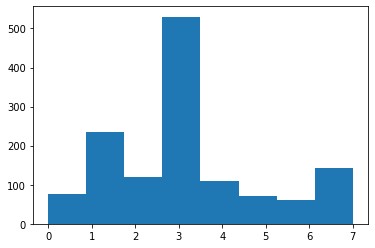

['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi', 'Tony Blair']


In [36]:
# построим гистограмму чтобы рассмотреть распределение классов
plt.hist(faces.target, bins = 8)
plt.show()

print(list(faces.target_names))

# из гистограммы мы можем наблюдать переизбыток изображений Джороджа Буша, что влияет на интерпретацию результатов модели

In [37]:
# уменьшим количество самплов в классах с наибольшим количеством
class3 = np.where(y == 3)[0]
class1 = np.where(y == 1)[0]

class3_downsampled = np.random.choice(class3, size = 450)
class1_downsampled = np.random.choice(class1, size = 50)

In [38]:
remove = np.concatenate((class1_downsampled, class3_downsampled), axis=0)

In [39]:
X_down = np.delete(X, list(remove), 0)
y_down = np.delete(y, list(remove), 0)

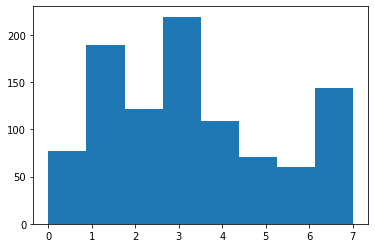

['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi', 'Tony Blair']


In [40]:
# распределение классов после даунсамплинга
plt.hist(y_down, bins = 8)
plt.show()

print(list(faces.target_names))

In [41]:
# делим данные на трейн и тест выборки
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(X_down, y_down, test_size = 0.3, random_state = 0)

In [42]:
n_components = 100
pca = PCA(n_components = n_components, whiten = True).fit(X_dtrain)

X_dtrain_pca = pca.transform(X_dtrain)
X_dtest_pca = pca.transform(X_dtest)

In [43]:
svm_model_dpca = GridSearchCV(model1, parameters1, cv = 5, n_jobs = -1)

svm_model_dpca.fit(X_dtrain_pca, y_dtrain)
print(svm_model_dpca.best_params_)

{'C': 10.0, 'kernel': 'rbf'}


In [44]:
svm_dpca = SVC(kernel = 'rbf', C = 10.0)
svm_dpca.fit(X_dtrain_pca, y_dtrain)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pred = svm_dpca.predict(X_dtest_pca)

print(classification_report(y_dtest, y_pred, target_names = faces.target_names))
print(confusion_matrix(y_dtest, y_pred, labels = range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.76      0.70      0.73        23
     Colin Powell       0.70      0.93      0.80        45
  Donald Rumsfeld       0.74      0.78      0.76        32
    George W Bush       0.82      0.88      0.85        75
Gerhard Schroeder       0.71      0.69      0.70        29
      Hugo Chavez       0.93      0.61      0.74        23
Junichiro Koizumi       1.00      0.74      0.85        23
       Tony Blair       0.88      0.79      0.83        47

         accuracy                           0.80       297
        macro avg       0.82      0.76      0.78       297
     weighted avg       0.81      0.80      0.80       297

[[16  5  2  0  0  0  0  0]
 [ 1 42  0  1  0  1  0  0]
 [ 1  1 25  2  2  0  0  1]
 [ 1  4  3 66  1  0  0  0]
 [ 0  2  3  2 20  0  0  2]
 [ 2  3  0  2  1 14  0  1]
 [ 0  1  0  3  1  0 17  1]
 [ 0  2  1  4  3  0  0 37]]
